<a href="https://colab.research.google.com/github/narfdf999/Arquitectura/blob/master/Comprobacion_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, BatchNormalization, Reshape, Conv2DTranspose
from keras.models import Model ,Sequential, load_model
from keras.optimizers import Adam
from keras import backend as K


In [0]:
encoder = load_model('/content/drive/My Drive/Pruebas Arquitectura/Autoencoder_definitivo/encoder_definitivo.h5')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
e_conv2d_1 (Conv2D)          (None, 17, 56, 32)        832       
_________________________________________________________________
e_maxpool_1 (MaxPooling2D)   (None, 16, 55, 32)        0         
_________________________________________________________________
e_conv2d_2 (Conv2D)          (None, 12, 51, 32)        25632     
_________________________________________________________________
e_maxpool_2 (MaxPooling2D)   (None, 11, 50, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 17600)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               2252928   
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512 

In [0]:
decoder = load_model('/content/drive/My Drive/Pruebas Arquitectura/Autoencoder_definitivo/decoder_definitivo.h5')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1920)              247680    
_________________________________________________________________
batch_normalization_13 (Batc (None, 1920)              7680      
_________________________________________________________________
reshape (Reshape)            (None, 3, 5, 128)         0         
_________________________________________________________________
conv2dt_1 (Conv2DTranspose)  (None, 21, 15, 64)        204864    
_________________________________________________________________
conv2dt_2 (Conv2DTranspose)  (None, 21, 60, 1)         1601      
Total params: 461,825
Trainable params: 457,985
Non-trainable params: 3,840
_________________________________________________________________


In [0]:
rnn = load_model('/content/drive/My Drive/Pruebas Arquitectura/rnn/perceptron_prueba1 (1).h5')
rnn.summary()

Model: "perceptron"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 130)               17160     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16768     
Total params: 33,928
Trainable params: 33,928
Non-trainable params: 0
_________________________________________________________________


In [0]:
mercator_aum = np.load('/content/drive/My Drive/Pruebas Arquitectura/Distancias_puntos_latente_mercator/mercator_aum.npy')

In [0]:
distancias = np.load('/content/drive/My Drive/Pruebas Arquitectura/Distancias_puntos_latente_mercator/distancias.npy')
print(distancias)

[[-1.09759273e-05  1.26278455e-03  0.00000000e+00]
 [-1.11000117e-05  1.26276524e-03  0.00000000e+00]
 [-1.12253765e-05  1.26274552e-03  0.00000000e+00]
 ...
 [ 8.17373200e-06 -1.26316271e-03  0.00000000e+00]
 [ 8.85979213e-06 -1.26308037e-03  0.00000000e+00]
 [ 9.54160040e-06 -1.26299196e-03  0.00000000e+00]]


In [0]:
latente = np.load('/content/drive/My Drive/Pruebas Arquitectura/Distancias_puntos_latente_mercator/latente.npy')
print(latente.shape)

(57461, 128)


In [0]:
def pred(visual_origen,distancias, encoder, rnn, decoder):
  visual_origen = np.expand_dims(visual_origen, axis = 0)
  prediccion = visual_origen
  latente1 = encoder.predict(visual_origen)
  distancias = np.expand_dims(distancias, axis = 1)
  latente1c = np.concatenate((latente1,distancias[0]), axis = -1)
  latente2 = rnn.predict(latente1c)
  latente1 = latente2
  latente2 = decoder.predict(latente2)
  prediccion = np.concatenate((prediccion,latente2), axis = -1)
  it = distancias.shape[0]
  for i in range(1,it):
    latente1c = np.concatenate((latente1,distancias[i]), axis = -1)
    latente2 = rnn.predict(latente1c)
    latente1 = latente2
    latente2 = decoder.predict(latente2)
    prediccion = np.concatenate((prediccion,latente2), axis = -1)
  
  return prediccion

In [0]:
prediccion = pred(mercator_aum[0],distancias[:1300], encoder, rnn, decoder)

In [0]:
print(prediccion.shape)

(1, 21, 60, 1301)


In [0]:
prediccion = np.squeeze(prediccion, axis = 0)

In [0]:
prediccionp=np.reshape(prediccion, [1301,21,60])

In [0]:
print(prediccionp[0].shape)

(21, 60)


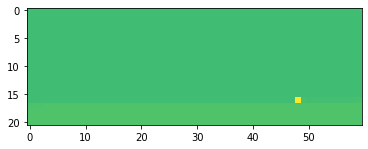

In [0]:
plt.imshow(prediccionp[940],vmin=-1,vmax=1)

In [0]:
predicciona = autoencoder.predict(x_train_au[0:1000])
predicciona = np.squeeze(predicciona, axis=-1)

In [0]:
prediccionb = encoder.predict(x_train_au[0:1000])
prediccionb = decoder.predict(prediccionb)
prediccionb = np.squeeze(prediccionb, axis=-1)

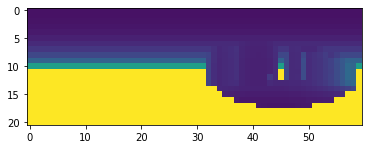

In [0]:
plt.imshow(x_train[50],vmin=-1,vmax=1)

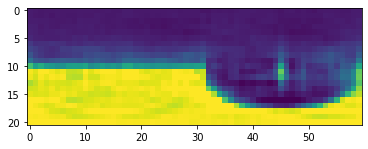

In [0]:
plt.imshow(predicciona[50],vmin=-1,vmax=1)

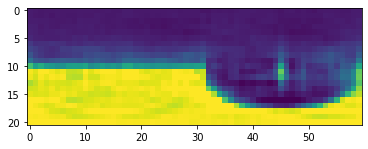

In [0]:
plt.imshow(prediccionb[50],vmin=-1,vmax=1)

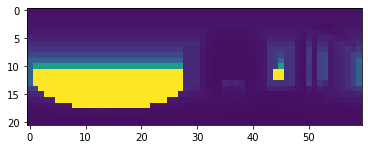

In [0]:
plt.imshow(x_train[100],vmin=-1,vmax=1)

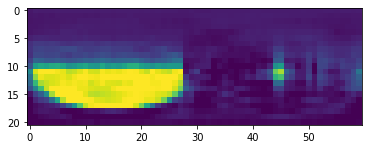

In [0]:
plt.imshow(predicciona[100],vmin=-1,vmax=1)

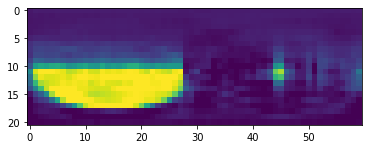

In [0]:
plt.imshow(prediccionb[100],vmin=-1,vmax=1)

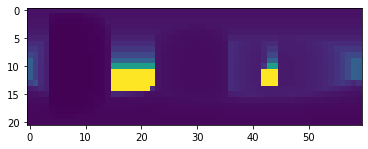

In [0]:
plt.imshow(x_train[150],vmin=-1,vmax=1)

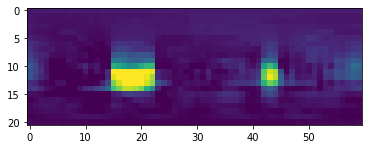

In [0]:
plt.imshow(predicciona[150],vmin=-1,vmax=1)

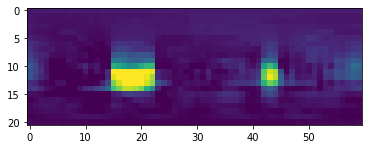

In [0]:
plt.imshow(prediccionb[150],vmin=-1,vmax=1)

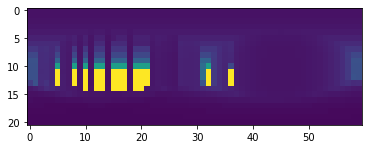

In [0]:
plt.imshow(x_train[200],vmin=-1,vmax=1)

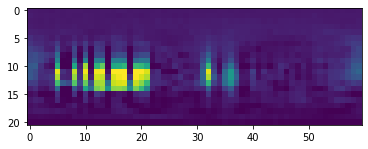

In [0]:
plt.imshow(predicciona[200],vmin=-1,vmax=1)

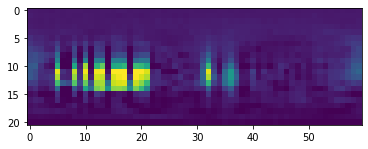

In [0]:
plt.imshow(prediccionb[200],vmin=-1,vmax=1)

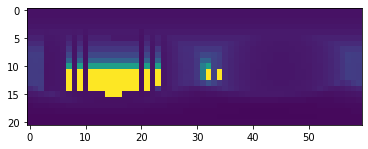

In [0]:
plt.imshow(x_train[250],vmin=-1,vmax=1)

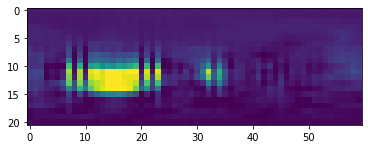

In [0]:
plt.imshow(predicciona[250],vmin=-1,vmax=1)

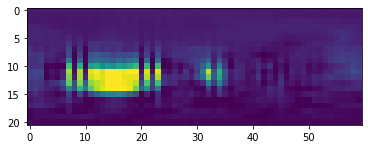

In [0]:
plt.imshow(prediccionb[250],vmin=-1,vmax=1)

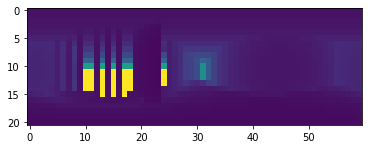

In [0]:
plt.imshow(x_train[300],vmin=-1,vmax=1)

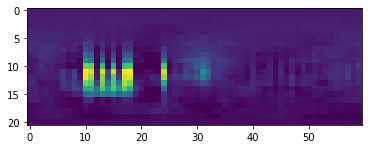

In [0]:
plt.imshow(predicciona[300],vmin=-1,vmax=1)

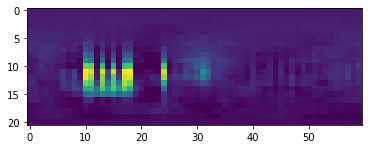

In [0]:
plt.imshow(prediccionb[300],vmin=-1,vmax=1)

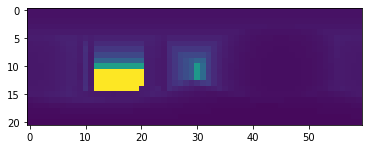

In [0]:
plt.imshow(x_train[350],vmin=-1,vmax=1)

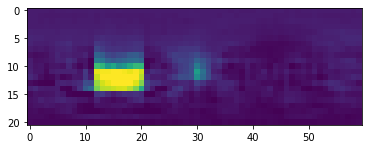

In [0]:
plt.imshow(predicciona[350],vmin=-1,vmax=1)

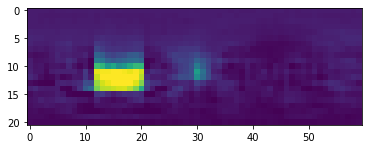

In [0]:
plt.imshow(prediccionb[350],vmin=-1,vmax=1)

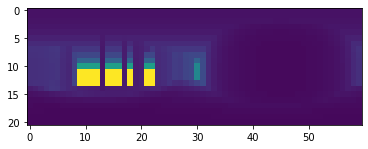

In [0]:
plt.imshow(x_train[400],vmin=-1,vmax=1)

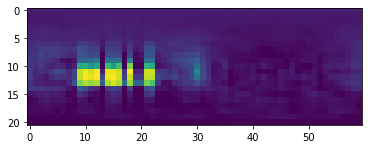

In [0]:
plt.imshow(predicciona[400],vmin=-1,vmax=1)

In [0]:
plt.imshow(prediccionb[400],vmin=-1,vmax=1)

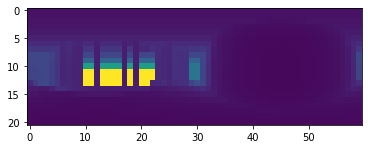

In [0]:
plt.imshow(x_train[450],vmin=-1,vmax=1)

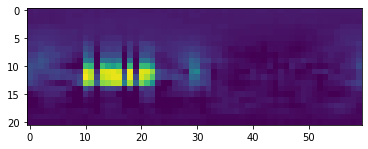

In [0]:
plt.imshow(predicciona[450],vmin=-1,vmax=1)

In [0]:
plt.imshow(prediccionb[450],vmin=-1,vmax=1)